In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
yolo_annotation = '0 0.6855 0.1495 0.1310 0.1331'
print("YOLO Annotation:", yolo_annotation)

YOLO Annotation: 0 0.6855 0.1495 0.1310 0.1331


In [3]:
image_path = r"D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000777.jpg"
img_bgr = cv2.imread(image_path)

if img_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]


parts = yolo_annotation.split()
class_id = int(parts[0])
x_center, y_center, w, h = map(float, parts[1:])

x_center *= width
y_center *= height
w *= width
h *= height

xmin = int(x_center - w / 2)
xmax = int(x_center + w / 2)
ymin = int(y_center - h / 2)
ymax = int(y_center + h / 2)


print(f"YOLO bbox (pixels): xmin = {xmin}, xmax = {xmax}, ymin = {ymin}, ymax = {ymax}")


YOLO bbox (pixels): xmin = 231, xmax = 280, ymin = 37, ymax = 98


In [4]:
mask = np.zeros((height, width), dtype=np.uint8)
mask[ymin:ymax, xmin:xmax] = 1

colored_mask = np.zeros_like(image)
colored_mask[mask == 1] = [255, 0, 0]  # Red color for the mask
alpha = 0.5  # Transparency factor
overlay = cv2.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

In [5]:
cv2.rectangle(overlay, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
cv2.putText(overlay, f'Class {class_id}', (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)



array([[[116, 116, 116],
        [114, 114, 114],
        [ 64,  64,  64],
        ...,
        [110, 110, 110],
        [116, 116, 116],
        [114, 114, 114]],

       [[116, 116, 116],
        [ 66,  66,  66],
        [ 20,  20,  20],
        ...,
        [  2,   2,   2],
        [  6,   6,   6],
        [ 98,  98,  98]],

       [[110, 110, 110],
        [ 20,  20,  20],
        [ 13,  13,  13],
        ...,
        [  0,   0,   0],
        [  3,   3,   3],
        [  0,   0,   0]],

       ...,

       [[116, 116, 116],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [  8,   8,   8],
        [ 29,  29,  29],
        [116, 116, 116]],

       [[114, 114, 114],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 38,  38,  38],
        [108, 108, 108],
        [116, 116, 116]],

       [[116, 116, 116],
        [118, 118, 118],
        [111, 111, 111],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [115, 115, 115]]

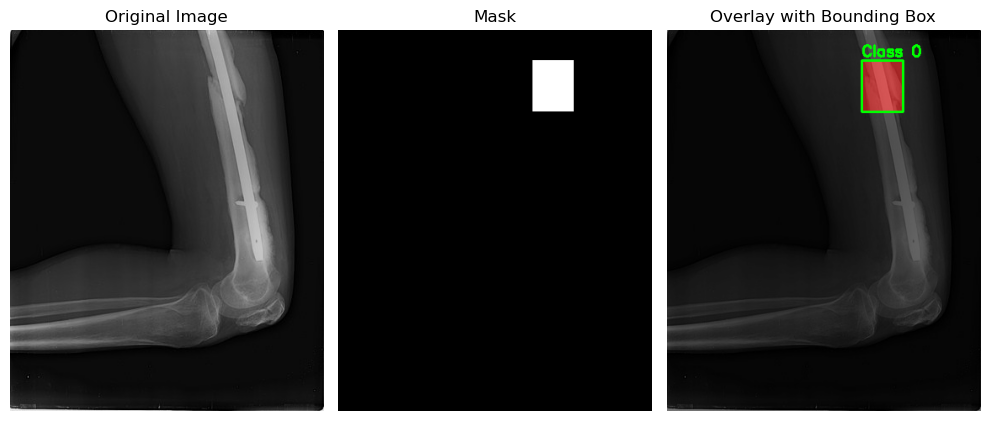

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')


plt.subplot(1,3,3)
plt.imshow(overlay)
plt.title('Overlay with Bounding Box')
plt.axis('off')


plt.tight_layout()
plt.show()

